# Neuron comparison with Scikit-Learn

Simple comparison between a single neuron for a classification and a regression
task.

## Classification

Binary classification task:

- 2-dimensional input features.
- 0 or 1 as possible classes.

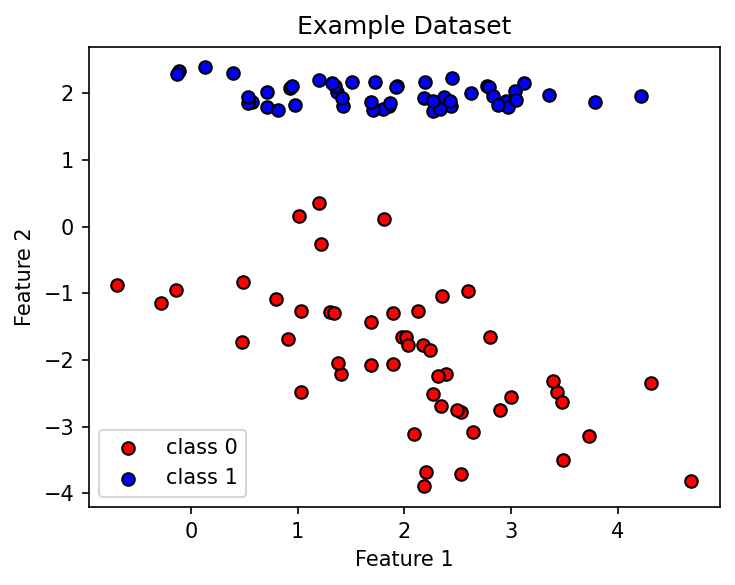

In [17]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

n_features = 2
X, y = [
    np.array(i)
    for i in make_classification(
        n_samples=100,
        n_features=n_features,
        n_informative=n_features,
        n_redundant=0,
        n_repeated=0,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=0,
    )
]

cls0 = X[y == 0].T
cls1 = X[y == 1].T

plt.figure(figsize=(5, 4), dpi=150)
plt.title("Example Dataset")

plt.scatter(cls0[0], cls0[1], c="r", ec="k", label="class 0")
plt.scatter(cls1[0], cls1[1], c="b", ec="k", label="class 1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()

The model is compared with Scikit-Learn `MLPClassifier` with one unit and same
hyper-parameters.

- _Logistic_ activation function.
- Learning rate $\eta = 0.03$.
- Stochastic Gradient Descent
- Batch size equal to 1


neuron loss: 0.0004
neuron accuracy: 1.00
sklearn loss: 0.0119
sklearn accuracy: 1.00


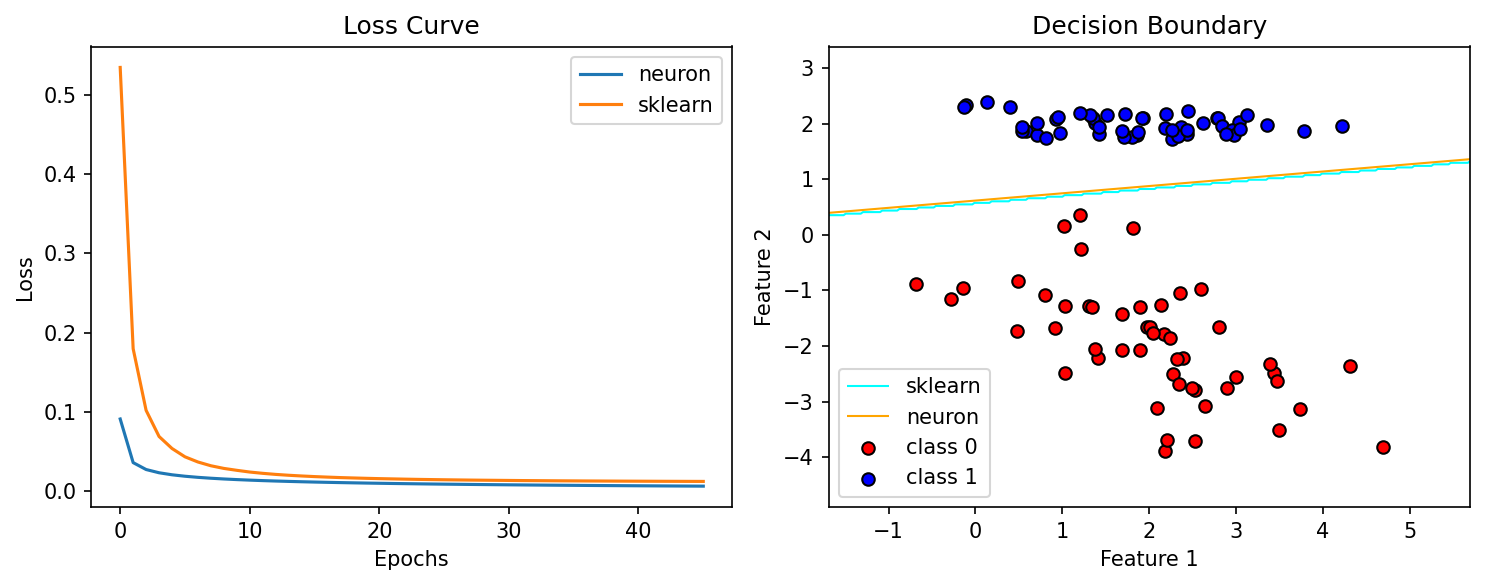

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from plotting import loss_decision_boundary
from network.neuron import Neuron


neuron = Neuron(
    activation="logistic",
    learning_rate=0.03,
    max_iter=1000,
)

neuron.train(X, y)
loss = neuron.loss
print(f"neuron loss: {loss:.4f}")

pred = np.round(neuron.predict(X))
accuracy = accuracy_score(y, pred)
print(f"neuron accuracy: {accuracy:.2f}")

# Scikit-Learn
mlp = MLPClassifier(
    hidden_layer_sizes=(1,),  # only 1 neuron
    activation="logistic",
    solver="sgd",
    learning_rate_init=0.03,
    batch_size=1,
    max_iter=1000,
)

mlp.fit(X, y)
print(f"sklearn loss: {mlp.loss_:.4f}")

pred = mlp.predict(X)
accuracy = accuracy_score(y, pred)
print(f"sklearn accuracy: {accuracy:.2f}")

loss_decision_boundary(neuron.loss_curve, mlp.loss_curve_, X, y, mlp, neuron)

## Regression

Univariate linear regression task.

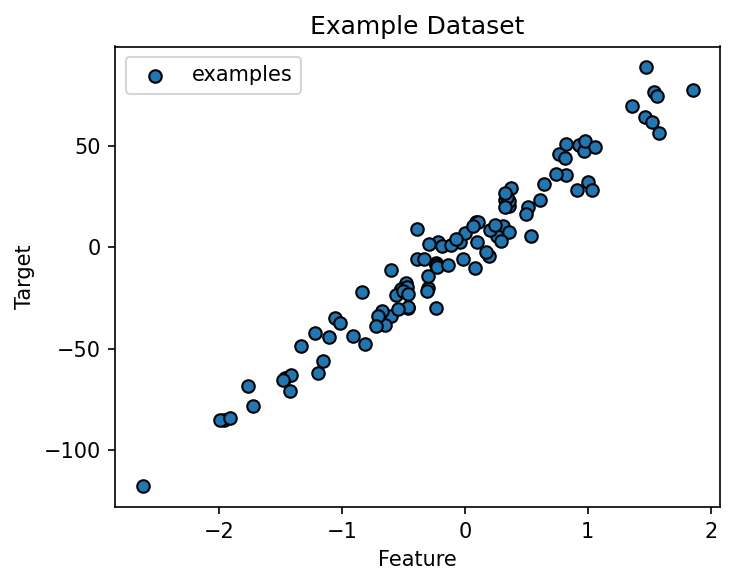

In [19]:
from sklearn.datasets import make_regression


X, y = [
    np.array(i)
    for i in make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        noise=10,
        random_state=42,
    )
]

plt.figure(figsize=(5, 4), dpi=150)
plt.title("Example Dataset")

plt.scatter(X.T[0], y, ec="k", label="examples")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.tight_layout()
plt.show()

The model is compared with Scikit-Learn `MLPRegressor` with one unit and same
hyper-parameters.

- _Linear_ activation function.
- Learning rate $\eta = 0.001$.
- Stochastic Gradient Descent
- Batch size equal to 1


neuron loss: 78.3103
neuron RMSE: 8.84
sklearn loss: 69.9401
sklearn RMSE: 9.27


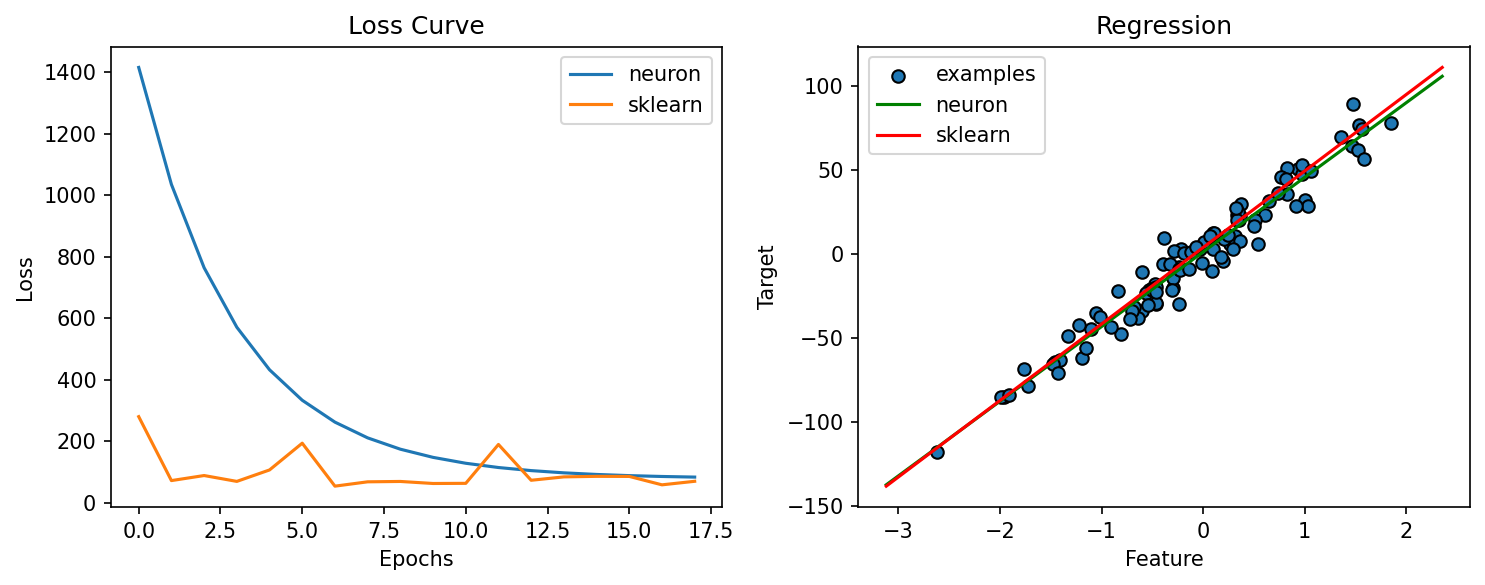

In [20]:
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor

from plotting import loss_fit


regressor = Neuron(
    activation="linear",
    learning_rate=0.001,
    max_iter=1000,
)

regressor.train(X, y)
loss = regressor.loss
print(f"neuron loss: {loss:.4f}")

pred = regressor.predict(X)
rmse = root_mean_squared_error(y, pred)
print(f"neuron RMSE: {rmse:.2f}")

# Scikit-Learn
mlp = MLPRegressor(
    hidden_layer_sizes=(1,),  # 1 neuron
    activation="identity",
    solver="sgd",
    learning_rate_init=0.001,
    batch_size=1,
    max_iter=1000,
)

mlp.fit(X, y)
print(f"sklearn loss: {mlp.loss_:.4f}")

pred = mlp.predict(X)
rmse = root_mean_squared_error(y, pred)
print(f"sklearn RMSE: {rmse:.2f}")

loss_fit(regressor.loss_curve, mlp.loss_curve_, X, y, regressor, mlp)